<a href="https://colab.research.google.com/github/Hudsonmq/Dev/blob/main/Atividade_Ativa_Probabilidade_e_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hudson Marques da Silva**



hudsonmq1@gmail.com


# Atvididade Ativa Probabilidade e Estatística

---


* Quantas compras foram registradas nesta base?
* Qual a quantidade de compras que foi feita por mulheres?
* Qual filial teve uma maior quantidade de vendas efetuadas ?


---


*  Qual a filial em que as mulheres fizeram mais compras que os homens?
*  Qual  o valor médio de compras realizadas por membros na cidade de Mandalay? 
*  Elabore um gráfico de barras mostrando o total valor total de pagamentos realizados em cada filial, diferenciando o tipo de pagamento. Podemos afirmar que há um meio de pagamento preferido pelos clientes da rede de supermercados?


---


*  Há outliers no valor total de compras realizadas?
*  Elabore um gráfico de boxplot com o valor das vendas de cada filial
*  Elabore um gráfico de linha que ilustra o valor total de vendas de acordo com a hora do dia. Há um horário que os clientes costumam gastar mais?


---


*  Utilizando uma matriz de correlação com todos os dados de compra da base. É possível identificar algum fator que interfira diretamente no índice de satisfação?
*  O índice de satisfação é maior entre os membros ou não membros? Para justificar a sua resposta verifique qual grupo apresenta menor variabilidade neste indicador.



In [131]:
#Os dados podem ser importados diretamente da internet, sem a necessidade de ser armazenada no computador local utilizando os comandos listados abaixoq 

import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sn

orig_url='https://drive.google.com/file/d/1_xtMC5q_7aK0ZhWa2W4Qv-kGXX0bYjgX/view?usp=sharing'


file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
dfs = pd.read_csv(csv_raw)
print(dfs.head())

    Invoice ID Branch       City  ... gross margin percentage gross income Rating
0  750-67-8428      A     Yangon  ...                4.761905      26.1415    9.1
1  226-31-3081      C  Naypyitaw  ...                4.761905       3.8200    9.6
2  631-41-3108      A     Yangon  ...                4.761905      16.2155    7.4
3  123-19-1176      A     Yangon  ...                4.761905      23.2880    8.4
4  373-73-7910      A     Yangon  ...                4.761905      30.2085    5.3

[5 rows x 17 columns]


In [132]:
#Biblioteca pandas
import pandas as pd


In [133]:
#Atribuição do dfs
df_shop = dfs 

In [134]:
#Dataset análise e estatísticas
df_shop.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [135]:
#Total de linhas e colunas do dataset
df_shop.shape

(1000, 17)

In [136]:
#Nome de todas as colunas do dataset
df_shop.keys()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Resolução das questões:

* **Quantas compras foram registradas nesta base?**

In [137]:
df_shop['Invoice ID'].nunique() #Retorna a quantidade de colunas, usando eixo 0, ou índice 1, ou colunas.

1000

* **Qual a quantidade de compras que foi feita por mulheres?**


In [177]:
df_shop[(df_shop['Gender'] == 'Female')] #A partir da coluna gênero, atribuímos igual(==) para o sexo feminino

#Após atribuído gênero pegamos todos ID e contamos a quantidade (==) sexo feminino.
df_shop[(df_shop['Gender'] == 'Female')]['Invoice ID'].count()

501

In [139]:
#Total de cada genero
df_shop['Gender'].value_counts() 

Female    501
Male      499
Name: Gender, dtype: int64

* **Qual filial teve uma maior quantidade de vendas efetuadas ?**

In [140]:
df_shop['Branch'].value_counts() # Valor total da coluna branch(A, B e C).

A    340
B    332
C    328
Name: Branch, dtype: int64

* **Qual a filial em que as mulheres fizeram mais compras que os homens?**

In [141]:
df_shop.groupby(['Branch','Gender'])['Invoice ID'].count() #Groupby.count nos dá os valores de cada grupo + o parametro que foi passado de branch + gênero.

Branch  Gender
A       Female    161
        Male      179
B       Female    162
        Male      170
C       Female    178
        Male      150
Name: Invoice ID, dtype: int64

* **Qual o valor médio de compras realizadas por membros na cidade de Mandalay**

In [142]:
df_temp = df_shop[(df_shop['City'] == 'Mandalay')]
df_temp[(df_temp['Customer type'] == 'Member')]['Total'].describe() 


count    165.000000
mean     325.482945
std      242.734212
min       20.107500
25%      116.140500
50%      258.678000
75%      470.988000
max      944.622000
Name: Total, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


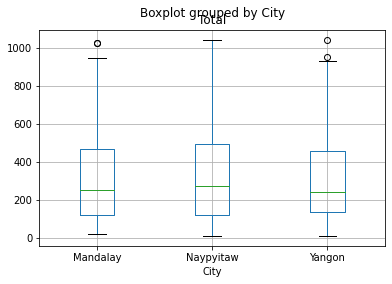

In [143]:
#Vamos visualizar o gráfico de boxplot dos dados
df_shop.boxplot(by='City',column='Total')

* **Elabore um gráfico de  barras mostrando o valor total de pagamentos realizados em cada filial, diferenciando o tipo de pagamento.**

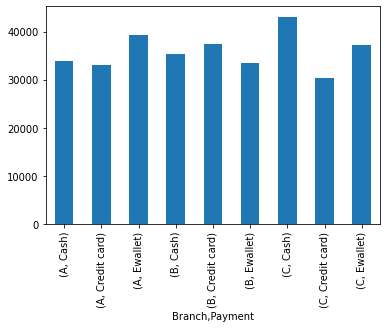

In [144]:
#Vamos criar um dataset temporário, contendo o valor total das compras, por tipo de pagamento E Filial
df_temp = df_shop.groupby(['Branch','Payment'])['Total'].sum()

#Vamos gerar o gráfico utilizando o dataset temporario
df_temp.plot.bar() #plot bar nada mais é que um gráfico de barras

* **Podemos afirmar que há um meio de pagamento preferido pelos clientes da rede de supermercados?**

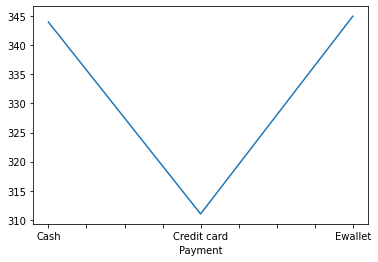

In [145]:
df_shop.groupby(['Payment'])['Invoice ID'].count()
df_shop.groupby(['Payment'])['Invoice ID'].count().plot() # Novamente usando o groupby, dessa vez com o plot para nos mostrar graficamente

In [146]:
df_shop.groupby(['Payment'])['Invoice ID'].count() #Os valores dos pagamentos sem gráfico

Payment
Cash           344
Credit card    311
Ewallet        345
Name: Invoice ID, dtype: int64

* **Há outliers no valor total de compras realizadas?**

In [147]:
# 822 representa 95% do valor total de compras
# Acima disso podemos considerar um outlier
max_thresold = df_shop['Total'].quantile(0.95)
max_thresold

822.4964999999997

In [148]:
#Outliers acima de 95%
df_shop[df_shop['Total']>max_thresold]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
43,228-96-1411,C,Naypyitaw,Member,Female,Food and beverages,98.70,8,39.4800,829.0800,3/4/2019,20:39,Cash,789.60,4.761905,39.4800,7.6
49,574-22-5561,C,Naypyitaw,Member,Female,Fashion accessories,82.63,10,41.3150,867.6150,3/19/2019,17:08,Ewallet,826.30,4.761905,41.3150,7.9
68,232-11-3025,A,Yangon,Normal,Male,Sports and travel,78.77,10,39.3850,827.0850,1/24/2019,10:04,Cash,787.70,4.761905,39.3850,6.4
70,393-65-2792,C,Naypyitaw,Normal,Male,Food and beverages,89.48,10,44.7400,939.5400,1/6/2019,12:46,Credit card,894.80,4.761905,44.7400,9.6
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,3/29/2019,10:25,Ewallet,878.70,4.761905,43.9350,5.1
105,704-48-3927,A,Yangon,Member,Male,Electronic accessories,88.67,10,44.3350,931.0350,1/12/2019,14:50,Ewallet,886.70,4.761905,44.3350,7.3
109,861-77-0145,C,Naypyitaw,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,3/3/2019,14:30,Cash,819.70,4.761905,40.9850,9.2
120,638-60-7125,A,Yangon,Normal,Female,Electronic accessories,99.56,8,39.8240,836.3040,2/14/2019,17:03,Credit card,796.48,4.761905,39.8240,5.2
122,219-22-9386,B,Mandalay,Member,Male,Sports and travel,99.96,9,44.9820,944.6220,3/9/2019,17:26,Credit card,899.64,4.761905,44.9820,4.2
129,549-84-7482,B,Mandalay,Normal,Female,Sports and travel,90.28,9,40.6260,853.1460,2/8/2019,11:15,Ewallet,812.52,4.761905,40.6260,7.2


In [149]:
# 253 representa 5% do valor total de compras
# Abaixo disso, podemos considerar um outlier
min_thresold = df_shop['Total'].quantile(0.5)
min_thresold

253.848

In [150]:
#Outliers abaixo de 5%
df_shop[df_shop['Total']>min_thresold]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,1/24/2019,18:10,Ewallet,766.00,4.761905,38.3000,6.0
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4


In [151]:
# Outlier mínimos e máximo
df_shop[(df_shop['Total']<max_thresold) & (df_shop['Total']>min_thresold)]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.8000,520.8000,1/3/2019,19:08,Credit card,496.00,4.761905,24.8000,6.2
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,1/24/2019,18:10,Ewallet,766.00,4.761905,38.3000,6.0


* **Elabore um gráfico de boxplot com o valor das vendas de cada filial**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


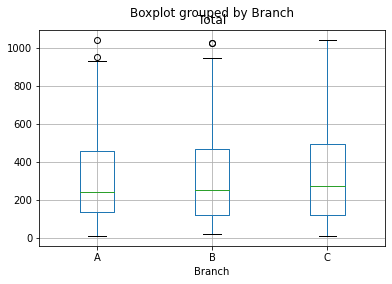

In [169]:
#Boxplot com os valores de venda das filiais
df_shop.boxplot(by='Branch',column='Total')

* **Elabore um gráfico de linha que ilustra o valor total de vendas de acordo com a hora do dia. Há um horário que os clientes costumam gastar mais?**


In [153]:
#Listando as horas
hora = df_shop['Time'].value_counts()
hora

14:42    7
19:48    7
17:38    6
11:40    5
10:11    5
        ..
18:20    1
15:45    1
10:19    1
16:07    1
12:17    1
Name: Time, Length: 506, dtype: int64

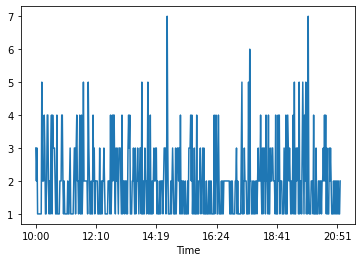

In [154]:
# As horas com mais compras são as 14h e as 19h
df_temp2 = df_shop.groupby(['Time'])['Total'].count()
df_shop.groupby(['Time'])['Total'].count().plot()

* **Utilizando uma matriz de correlação com todos os dados de compra da base. É possível identificar algum fator que interfira diretamente no índice de satisfação?**

In [155]:
#Listado o score que todos os compradores deram
df_shop['Rating'].value_counts()
df_rat = df_shop['Rating'].value_counts()
df_rat


6.0     26
6.6     24
9.5     22
4.2     22
8.0     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64

In [156]:
#requisição de uma matrix de todo "df_shop"
corrMatrix = df_shop.corr()

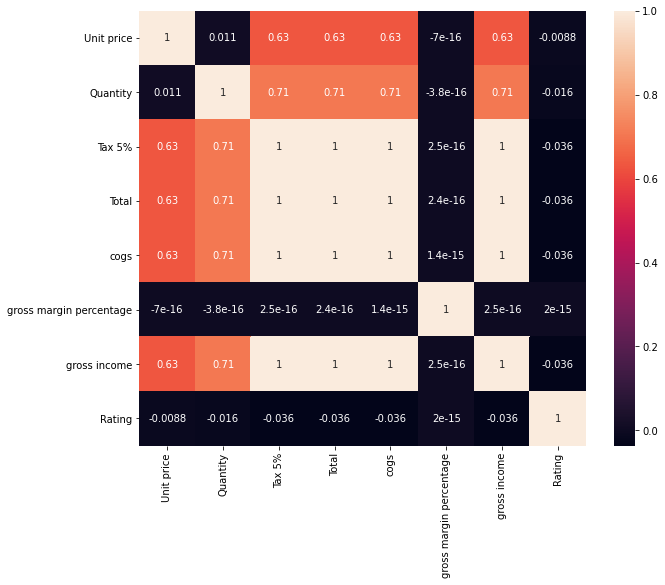

In [176]:
#Todo o comando para criação da matriz em gráfico, tamanho e com annot true, para mostrar os valores
f, ax = plt.subplots(figsize=(10, 8))
sn.heatmap(corrMatrix, annot=True)
plt.show()

* **O índice de satisfação é maior entre os membros ou não membros? Para justificar a sua resposta verifique qual grupo apresenta menor variabilidade neste indicador.**

In [158]:
#Dividindo votos por membros e não membros
df_shop['Customer type'].value_counts()
df_membtyp = df_shop['Customer type'].value_counts()
df_membtyp

Member    501
Normal    499
Name: Customer type, dtype: int64

In [159]:
df_shop['Rating'].value_counts()

6.0     26
6.6     24
9.5     22
4.2     22
8.0     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: Rating, Length: 61, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


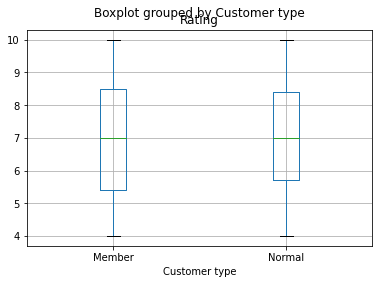

In [174]:
#Aqui em boxplot a diferença de voto entre membros e não membros, chega a ser quase irrelevante mas, os não membros representam a menor variabilidade
df_shop.boxplot(by='Customer type', column='Rating')